In [0]:
import numpy as np
import matplotlib.pyplot as plt
import statistics


**reading the data**

In [0]:
f = open("/content/drive/My Drive/ann-train.data","r")
train_data= f.read().splitlines(True)

In [74]:
train_data

['0.73 0 1 0 0 0 0 0 1 0 0 0 0 0 0 0 0.0006 0.015 0.12 0.082 0.146 3  \n',
 '0.24 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0.00025 0.03 0.143 0.133 0.108 3  \n',
 '0.47 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0.0019 0.024 0.102 0.131 0.078 3  \n',
 '0.64 1 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0.0009 0.017 0.077 0.09 0.085 3  \n',
 '0.23 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0.00025 0.026 0.139 0.09 0.153 3  \n',
 '0.69 1 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0.00025 0.016 0.086 0.07 0.123 3  \n',
 '0.85 1 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0.00025 0.023 0.128 0.104 0.121 3  \n',
 '0.48 1 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0.00208 0.02 0.086 0.078 0.11 3  \n',
 '0.67 0 1 0 0 0 0 0 0 0 0 0 0 0 0 0 0.0013 0.024 0.087 0.109 0.08 3  \n',
 '0.76 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0.0001 0.029 0.124 0.128 0.097 3  \n',
 '0.62 0 0 0 0 1 0 0 0 0 0 0 0 0 0 0 0.011 0.008 0.073 0.074 0.098 2  \n',
 '0.18 1 0 0 0 0 0 0 0 0 0 0 0 0 0 1 0.0001 0.023 0.098 0.085 0.115 3  \n',
 '0.59 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0.0008 0.023 0.094 0.099 0.09475 3  \n',
 '0.49 0 1 0 0

###**TRAINING PART**

**creating data matrix**

In [0]:
def create_matrix(data):
  data_matrix = []
  labels = []

  for line in data:
    temp = line.strip('\n').strip(' ').split()
    temp = list(map(float, temp))                   # convert string to float
    labels.append(temp[-1])                         # appending last element because it is the label
    temp.pop(-1)                                    # remove the last element because it is the label and not required for training
    data_matrix.append(temp)

  return data_matrix,labels

In [0]:
data_matrix,labels = create_matrix(train_data)

data_matrix = np.asarray(data_matrix)
labels = np.asarray(labels)

In [76]:
data_matrix.shape

(3772, 21)

In [77]:
labels.shape

(3772,)

**Variance based feature selection**

In [0]:
variance = []

for i in range(0,21):
  temp = np.var(data_matrix[:,i])
  variance.append(temp)

In [0]:
median_v = statistics.median(variance)

*finding the features that have to be dropped*

In [0]:
dropped_features = []

for i in range(0,21):
  if(variance[i] < median_v):
    dropped_features.append(i)

In [134]:
dropped_features

[3, 4, 11, 12, 14, 16, 17, 18, 19, 20]

In [135]:
len(dropped_features)

10

*reducing the features*

In [0]:
reduced_matrix = np.delete(data_matrix, np.s_[dropped_features], axis=1)

In [137]:
reduced_matrix.shape

(3772, 11)

**RNN MODEL**

In [52]:
import tensorflow as tf

from keras.models import Sequential 
from keras.layers import Dense, Activation

from sklearn.model_selection import KFold

kf = KFold(n_splits=10, random_state=1, shuffle=True)

model = Sequential()
model.add(Dense(256, activation='relu', input_dim=21))
model.add(Dense(128, activation='relu'))
model.add(Dense(32, activation='relu'))
model.add(Dense(4, activation='softmax'))
model.compile(optimizer='adam',loss='sparse_categorical_crossentropy',metrics=['accuracy'])

for train_index, test_index in kf.split(data_matrix):
    X_train, X_test = data_matrix[train_index], data_matrix[test_index]
    y_train, y_test = labels[train_index], labels[test_index]
    
    model.fit(X_train, y_train, epochs=15, batch_size=32)
    score = model.evaluate(X_test, y_test, batch_size=32)
    print(score)

Epoch 1/15
3394/3394 [==============================] - 0s 87us/step - loss: 0.4704 - accuracy: 0.8960
Epoch 2/15
3394/3394 [==============================] - 0s 53us/step - loss: 0.2955 - accuracy: 0.9225
Epoch 3/15
3394/3394 [==============================] - 0s 53us/step - loss: 0.2660 - accuracy: 0.9228
Epoch 4/15
3394/3394 [==============================] - 0s 57us/step - loss: 0.2318 - accuracy: 0.9302
Epoch 5/15
3394/3394 [==============================] - 0s 59us/step - loss: 0.1992 - accuracy: 0.9402
Epoch 6/15
3394/3394 [==============================] - 0s 55us/step - loss: 0.1880 - accuracy: 0.9434
Epoch 7/15
3394/3394 [==============================] - 0s 54us/step - loss: 0.1779 - accuracy: 0.9428
Epoch 8/15
3394/3394 [==============================] - 0s 52us/step - loss: 0.1815 - accuracy: 0.9431
Epoch 9/15
3394/3394 [==============================] - 0s 54us/step - loss: 0.1697 - accuracy: 0.9467
Epoch 10/15
3394/3394 [==============================] - 0s 53us/step - l

In [0]:
# model.save("/content/drive/My Drive/rnn_model.h5")
model.save("rnn_model.h5")

**SVM MODEL**

**Tuning parameters for SVM**

In [0]:
#  source : https://medium.com/@aneesha/svm-parameter-tuning-in-scikit-learn-using-gridsearchcv-2413c02125a0
#           https://scikit-learn.org/stable/modules/generated/sklearn.model_selection.GridSearchCV.html

from sklearn import svm
from sklearn.model_selection import GridSearchCV

def svc_param_selection(X, y, nfolds):
    Cs = [0.001, 0.01, 0.1, 1, 10]
    gammas = [0.001, 0.01, 0.1, 1]
    param_grid = {'C': Cs, 'gamma' : gammas}
    grid_search = GridSearchCV(svm.SVC(kernel='linear'), param_grid, cv=nfolds)
    grid_search.fit(X, y)
    grid_search.best_params_
    
    return grid_search.best_params_

In [56]:
ans = svc_param_selection(data_matrix,labels,10)
print(ans)

{'C': 10, 'gamma': 0.001}


**Building the model**

In [59]:
from sklearn.model_selection import cross_val_score
from sklearn import svm

kf = KFold(n_splits=10, random_state=1, shuffle=True)

clf = svm.SVC(kernel='poly', gamma = 0.001, C=10,degree=2)

for train_index, test_index in kf.split(data_matrix):
    X_train, X_test = data_matrix[train_index], data_matrix[test_index]
    y_train, y_test = labels[train_index], labels[test_index]
    
    clf = clf.fit(X_train, y_train)
    scores = cross_val_score(clf, X_test, y_test, cv=8)
    print(scores)

/usr/local/lib/python3.6/dist-packages/sklearn/model_selection/_split.py:667: UserWarning: The least populated class in y has only 7 members, which is less than n_splits=8.
  % (min_groups, self.n_splits)), UserWarning)


[0.9375     0.9375     0.95744681 0.95744681 0.95744681 0.93617021
 0.93617021 0.93617021]
[0.91666667 0.91666667 0.93617021 0.93617021 0.93617021 0.93617021
 0.93617021 0.91489362]
[0.875      0.89361702 0.89361702 0.89361702 0.91489362 0.91489362
 0.89361702 0.89361702]


/usr/local/lib/python3.6/dist-packages/sklearn/model_selection/_split.py:667: UserWarning: The least populated class in y has only 6 members, which is less than n_splits=8.
  % (min_groups, self.n_splits)), UserWarning)


[0.9375     0.95744681 0.95744681 0.95744681 0.93617021 0.93617021
 0.93617021 0.93617021]
[0.89583333 0.91489362 0.91489362 0.91489362 0.91489362 0.91489362
 0.91489362 0.89361702]
[0.91666667 0.93617021 0.91489362 0.91489362 0.91489362 0.91489362
 0.91489362 0.91489362]
[0.91666667 0.93617021 0.93617021 0.91489362 0.91489362 0.91489362
 0.91489362 0.91489362]
[0.9375     0.95744681 0.95744681 0.95744681 0.95744681 0.95744681
 0.95744681 0.93617021]
[0.89583333 0.91489362 0.91489362 0.91489362 0.91489362 0.91489362
 0.91489362 0.91489362]
[0.91666667 0.93617021 0.93617021 0.91489362 0.91489362 0.91489362
 0.91489362 0.91489362]


/usr/local/lib/python3.6/dist-packages/sklearn/model_selection/_split.py:667: UserWarning: The least populated class in y has only 7 members, which is less than n_splits=8.
  % (min_groups, self.n_splits)), UserWarning)


In [0]:
model.save("svm_model.h5")

###**TESTING PART**

**reading the test data**

In [0]:
f1 = open("/content/drive/My Drive/ann-test.data","r")
test_data= f1.read().splitlines(True)

In [0]:
test_data

**creating test matrix**

In [0]:
test_matrix,true_labels = create_matrix(test_data)

test_matrix = np.asarray(test_matrix)
true_labels = np.asarray(true_labels)

In [70]:
test_matrix.shape

(3428, 21)

In [72]:
true_labels.shape

(3428,)

**Heat Plot**

In [0]:
def heat_plot(y_true,y_pred,matrix):
  
  labels = ["1","2","3"]

  fig = plt.figure()
  ax = fig.add_subplot(111)
  cax = ax.matshow(matrix,cmap = 'tab20c')
  fig.colorbar(cax)
  ax.set_fc('y')
  ax.set_xticklabels([''] + labels)
  ax.set_yticklabels([''] + labels)

  # Loop over data dimensions and create text annotations.
  for i in range(3):
    for j in range(3):
      text = ax.text(j, i, matrix[i, j],ha="center", va="center", color="w")
  
  fig.tight_layout()
  plt.xlabel('Predicted')
  plt.ylabel('True')
  plt.show()

**Generate Predictions**

> Using RNN model





In [0]:
pred_rnn = model.predict_classes(test_matrix)

In [81]:
from sklearn.metrics import accuracy_score

accuracy_score(true_labels, pred_rnn)

0.9824970828471412

In [0]:
from sklearn.metrics import confusion_matrix

conf_rnn = confusion_matrix(true_labels, pred_rnn)

In [99]:
conf_rnn

array([[  62,    7,    4],
       [   0,  162,   15],
       [   9,   25, 3144]])

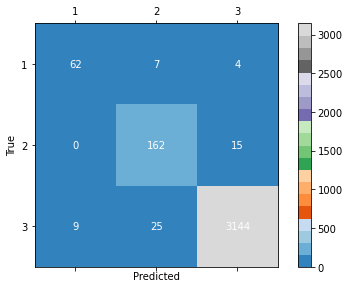

In [100]:
heat_plot(true_labels,pred_rnn,conf_rnn)



> Using SVM model


In [0]:
pred_svm = clf.predict(test_matrix)

In [85]:
from sklearn.metrics import accuracy_score

accuracy_score(true_labels, pred_svm)

0.927071178529755

In [0]:
from sklearn.metrics import confusion_matrix

conf_svm = confusion_matrix(true_labels, pred_svm)

In [102]:
conf_svm

array([[   0,    0,   73],
       [   0,    0,  177],
       [   0,    0, 3178]])

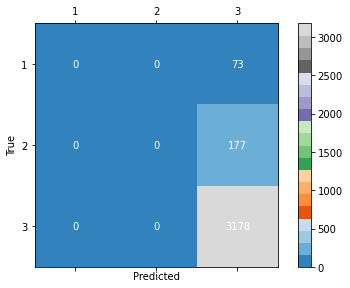

In [103]:
heat_plot(true_labels,pred_rnn,conf_svm)

> **Training SVM model after feature selection**



In [138]:
ans = svc_param_selection(reduced_matrix,labels,10)
print(ans)

{'C': 0.001, 'gamma': 0.001}


In [144]:
from sklearn.model_selection import cross_val_score
from sklearn import svm

kf = KFold(n_splits=10, random_state=1, shuffle=True)

clf_2 = svm.SVC(kernel='poly', gamma = 0.001, C=0.001,degree=2)

for train_index, test_index in kf.split(reduced_matrix):
    X_train, X_test = reduced_matrix[train_index], reduced_matrix[test_index]
    y_train, y_test = labels[train_index], labels[test_index]
    
    clf_2 = clf_2.fit(X_train, y_train)
    scores = cross_val_score(clf, X_test, y_test, cv=8)
    print(scores)

/usr/local/lib/python3.6/dist-packages/sklearn/model_selection/_split.py:667: UserWarning: The least populated class in y has only 7 members, which is less than n_splits=8.
  % (min_groups, self.n_splits)), UserWarning)
/usr/local/lib/python3.6/dist-packages/sklearn/model_selection/_split.py:667: UserWarning: The least populated class in y has only 6 members, which is less than n_splits=8.
  % (min_groups, self.n_splits)), UserWarning)


[0.9375     0.9375     0.95744681 0.95744681 0.95744681 0.93617021
 0.93617021 0.93617021]
[0.91666667 0.91666667 0.93617021 0.93617021 0.93617021 0.93617021
 0.93617021 0.91489362]
[0.875      0.89361702 0.89361702 0.89361702 0.91489362 0.91489362
 0.89361702 0.89361702]
[0.9375     0.95744681 0.95744681 0.95744681 0.93617021 0.93617021
 0.93617021 0.93617021]
[0.89583333 0.91489362 0.91489362 0.91489362 0.91489362 0.91489362
 0.91489362 0.89361702]
[0.91666667 0.93617021 0.91489362 0.91489362 0.91489362 0.91489362
 0.91489362 0.91489362]
[0.91666667 0.93617021 0.93617021 0.91489362 0.91489362 0.91489362
 0.91489362 0.91489362]
[0.9375     0.95744681 0.95744681 0.95744681 0.95744681 0.95744681
 0.95744681 0.93617021]
[0.89583333 0.91489362 0.91489362 0.91489362 0.91489362 0.91489362
 0.91489362 0.91489362]
[0.91666667 0.93617021 0.93617021 0.91489362 0.91489362 0.91489362
 0.91489362 0.91489362]


/usr/local/lib/python3.6/dist-packages/sklearn/model_selection/_split.py:667: UserWarning: The least populated class in y has only 7 members, which is less than n_splits=8.
  % (min_groups, self.n_splits)), UserWarning)


In [0]:
test_matrix_2 = np.delete(test_matrix, np.s_[dropped_features], axis=1) 

In [151]:
test_matrix_2.shape

(3428, 11)

In [0]:
pred_svm_2 = clf_2.predict(test_matrix_2)

In [149]:
accuracy_score(true_labels, pred_svm_2)

0.927071178529755

In [150]:
confusion_matrix(true_labels, pred_svm_2)

array([[   0,    0,   73],
       [   0,    0,  177],
       [   0,    0, 3178]])